In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
# matplotlib.rc 또는 plt.rc 모두 가능
matplotlib.rc('font', family=font_name)

금연클리닉 상담 기록에서 지역별 금연 성공률(전체 데이터 양과 6개월 평가 성공부 비교), 

In [ ]:
income = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/personal_income.csv')
smoke1 = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/smoke1.csv')
smoke2 = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/smoke2.csv')
smoke3 = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/smoke3.csv')

print(smoke1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235379 entries, 0 to 235378
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   기관유형              235379 non-null  object 
 1   지역                235379 non-null  object 
 2   서비스구분             235379 non-null  object 
 3   제공기관              235379 non-null  object 
 4   출생년도              235379 non-null  object 
 5   성별                235379 non-null  object 
 6   등록일자(년도)          235379 non-null  int64  
 7   등록일자(월)           235379 non-null  int64  
 8   등록유형              235379 non-null  object 
 9   금연결심일자(년도)        231278 non-null  float64
 10  금연결심일자(월)         231278 non-null  float64
 11  상담횟수              235061 non-null  float64
 12  서비스상태             235379 non-null  object 
 13  종결일자(년도)          132216 non-null  float64
 14  종결일자(월)           132216 non-null  float64
 15  4주평가성공여부          235379 non-null  object 
 16  4주평가방법            15

In [ ]:
print(smoke1['지역'].value_counts().sort_index())
print(income['시도별'].value_counts().sort_index())

income['시도별']

지역
강원특별자치도     9082
경기도        55786
경상남도       16185
경상북도       15364
광주광역시       6862
대구광역시      10945
대전광역시       5804
부산광역시      11199
서울특별시      37015
세종특별자치시     1058
울산광역시       5944
인천광역시      14912
전라남도       11238
전북특별자치도     8458
제주특별자치도     5232
충청남도       11467
충청북도        8828
Name: count, dtype: int64
시도별
강원특별자치도    1
경기도        1
경상남도       1
경상북도       1
광주광역시      1
대구광역시      1
대전광역시      1
부산광역시      1
서울특별시      1
세종특별자치시    1
울산광역시      1
인천광역시      1
전국         1
전라남도       1
전북특별자치도    1
제주특별자치도    1
충청남도       1
충청북도       1
Name: count, dtype: int64


In [31]:
smoke1_14 = smoke1.iloc[:, :15]
smoke1_30 = smoke1.iloc[:, 15:]
smoke1_14.info()
smoke1_14.head()

smoke1_14.groupby('서비스구분')['기관유형'].count()

# g = df.groupby("컬럼명")
# list(g.groups.keys())

smoke1_14.groupby('서비스구분').groups.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235379 entries, 0 to 235378
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기관유형        235379 non-null  object 
 1   지역          235379 non-null  object 
 2   서비스구분       235379 non-null  object 
 3   제공기관        235379 non-null  object 
 4   출생년도        235379 non-null  object 
 5   성별          235379 non-null  object 
 6   등록일자(년도)    235379 non-null  int64  
 7   등록일자(월)     235379 non-null  int64  
 8   등록유형        235379 non-null  object 
 9   금연결심일자(년도)  231278 non-null  float64
 10  금연결심일자(월)   231278 non-null  float64
 11  상담횟수        235061 non-null  float64
 12  서비스상태       235379 non-null  object 
 13  종결일자(년도)    132216 non-null  float64
 14  종결일자(월)     132216 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 26.9+ MB


dict_keys(['단기금연캠프', '보건소 금연클리닉', '찾아가는 금연서비스'])

In [89]:
# print(smoke1_14.groupby('등록일자(년도)')['등록일자(월)'].count())

# smoke1_14[smoke1_14['등록일자(년도)'] == 2023].count()

print(smoke1_14['금연결심일자(년도)'].isna().sum())

print(smoke1_14.isna().sum())

4101
기관유형               0
지역                 0
서비스구분              0
제공기관               0
출생년도               0
성별                 0
등록일자(년도)           0
등록일자(월)            0
등록유형               0
금연결심일자(년도)      4101
금연결심일자(월)       4101
상담횟수             318
서비스상태              0
종결일자(년도)      103163
종결일자(월)       103163
dtype: int64


In [91]:
smoke1_14.groupby('서비스상태')['금연결심일자(년도)'].apply(lambda x: x.isna().mean())

서비스상태
금연유지    0.000000
미결심     0.964130
정상종결    0.000000
중간종결    0.032801
Name: 금연결심일자(년도), dtype: float64

# 0번 '기관유형' & 2번 '서비스구분'
## 금연을 시도하는 사람은 자발적으로 시도하려는 사람이 더 많다


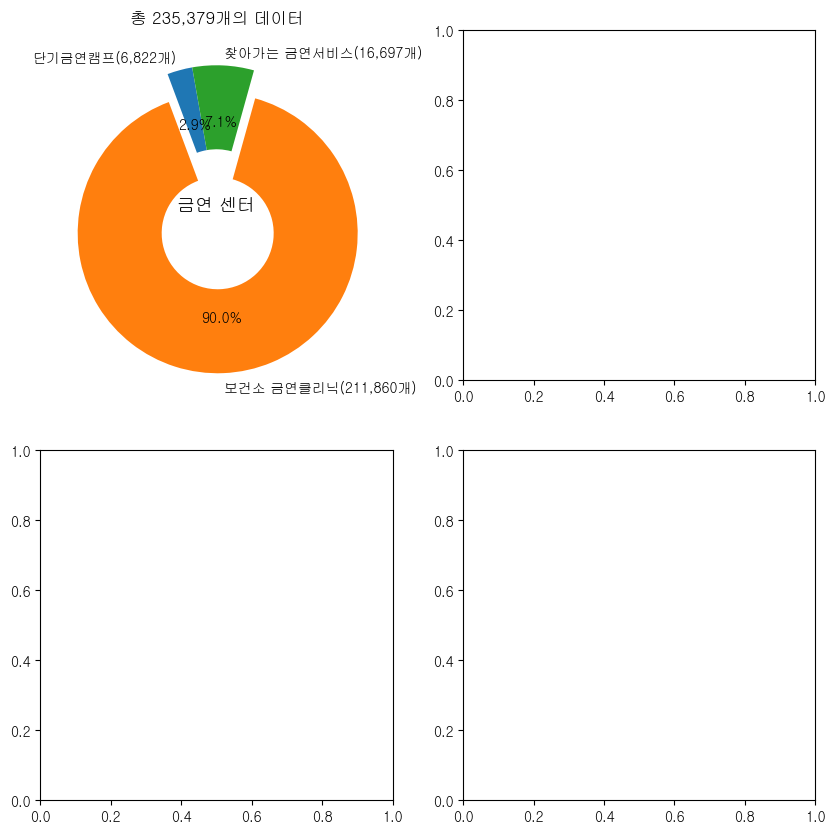

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

# ax[0,0]
# 0번 '기관유형' & 2번 '서비스구분'
size = smoke1_14.groupby('서비스구분')['기관유형'].count()
index = smoke1_14.groupby('서비스구분').groups.keys()

labels = [f'{index}({size:,}개)' for index , size in zip(index, size)]

ax[0,0].pie(
    size,
    labels=labels,
    # colors=['skyblue', 'lightgreen', 'lightcoral'],
    startangle=100,
    autopct = '%.1f%%',
    explode = [0, 0.2, 0],
    wedgeprops = {'width': 0.6}
)
counts = smoke1_14['서비스구분'].value_counts()
total = counts.sum()
ax[0,0].set_title(f'총 {total:,}개의 데이터')
ax[0,0].text(0, 0, '금연 센터', ha='center', va='center', fontsize = 13)

# ax[0,1]





plt.show()

In [ ]:
smoke1_30.info()
smoke1_30.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235379 entries, 0 to 235378
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   4주평가성공여부          235379 non-null  object 
 1   4주평가방법            155866 non-null  object 
 2   4주평가_측정값(일산화탄소)   21886 non-null   float64
 3   4주평가_측정값(코티닌)     5051 non-null    object 
 4   6주평가성공여부          235379 non-null  object 
 5   6주평가방법            134002 non-null  object 
 6   6주평가_측정값(일산화탄소)   18223 non-null   float64
 7   6주평가_측정값(코티닌)     4235 non-null    object 
 8   12주평가성공여부         235379 non-null  object 
 9   12주평가방법           90435 non-null   object 
 10  12주평가_측정값(일산화탄소)  13734 non-null   float64
 11  12주평가_측정값(코티닌)    12709 non-null   object 
 12  6개월평가성공여부         235379 non-null  object 
 13  6개월평가방법           45236 non-null   object 
 14  6개월평가_측정값(일산화탄소)  9415 non-null    float64
 15  6개월평가_측정값(코티닌)    23393 non-null   object 
dtypes: float64(4), objec

,4주평가성공여부,4주평가방법,4주평가_측정값(일산화탄소),4주평가_측정값(코티닌),6주평가성공여부,6주평가방법,6주평가_측정값(일산화탄소),6주평가_측정값(코티닌),12주평가성공여부,12주평가방법,12주평가_측정값(일산화탄소),12주평가_측정값(코티닌),6개월평가성공여부,6개월평가방법,6개월평가_측정값(일산화탄소),6개월평가_측정값(코티닌)
0,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN
1,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN
2,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN
3,Y,자가,NaN,NaN,Y,자가,NaN,NaN,Y,자가,NaN,NaN,미실시,NaN,NaN,NaN
4,미실시,NaN,NaN,NaN,미실시,NaN,NaN,NaN,미실시,NaN,NaN,NaN,미실시,NaN,NaN,NaN


In [128]:
import pandas as pd
import io

# Load the datasets
income_df = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/personal_income.csv')
smoke_df = pd.read_csv('C:/Workspaces/SKN22-EDA-2Team/data/smoke1.csv')

# 1. Get unique regions from personal_income.csv
# The column name is '시도별'. We exclude '전국' for matching individual regions first.
income_regions = income_df['시도별'].unique()
income_regions_list = [r for r in income_regions if r != '전국']

# 2. Filter/Group smoke1.csv by these regions
# The column in smoke1 is '지역'.
# We will count the entries for each region present in the income file.

# Filter smoke_df to include only regions in income_regions_list
smoke_filtered = smoke_df[smoke_df['지역'].isin(income_regions_list)]

# Group by '지역' and count
region_counts = smoke_filtered['지역'].value_counts().reset_index()
region_counts.columns = ['지역', '이용자 수']

# Print the result
print("Data collected by region from smoke1.csv (based on personal_income regions):")
print(region_counts)

# Check if there are any regions in smoke1 not covered (just for info)
unique_smoke_regions = smoke_df['지역'].unique()
missing_regions = set(unique_smoke_regions) - set(income_regions_list)
if missing_regions:
    print("\nRegions in smoke1 not found in personal_income (excluding '전국'):")
    print(missing_regions)
else:
    print("\nAll regions in smoke1 mapped successfully to personal_income regions.")

Data collected by region from smoke1.csv (based on personal_income regions):
         지역  이용자 수
0       경기도  55786
1     서울특별시  37015
2      경상남도  16185
3      경상북도  15364
4     인천광역시  14912
5      충청남도  11467
6      전라남도  11238
7     부산광역시  11199
8     대구광역시  10945
9   강원특별자치도   9082
10     충청북도   8828
11  전북특별자치도   8458
12    광주광역시   6862
13    울산광역시   5944
14    대전광역시   5804
15  제주특별자치도   5232
16  세종특별자치시   1058

All regions in smoke1 mapped successfully to personal_income regions.


### 1. 지역별 금연 성공률 (6개월 성공률 높은 순)
     지역  전체이용자수  4주성공률  6개월성공률
세종특별자치시    1058   96.0    27.7
  울산광역시    5944   80.6    25.2
  부산광역시   11199   80.9    24.3
전북특별자치도    8458   76.2    23.8
  대전광역시    5804   67.5    23.0
   경상남도   16185   69.9    22.3
제주특별자치도    5232   65.3    21.8
   충청북도    8828   81.9    21.5
   전라남도   11238   74.0    21.1
강원특별자치도    9082   70.0    20.1
   충청남도   11467   67.9    19.0
  서울특별시   37015   56.4    18.0
    경기도   55786   61.5    17.8
   경상북도   15364   69.1    17.4
  광주광역시    6862   74.6    16.6
  인천광역시   14912   59.3    16.1
  대구광역시   10945   59.3    14.2

### 2. 소득과 6개월 금연 성공률의 상관계수: 0.1006


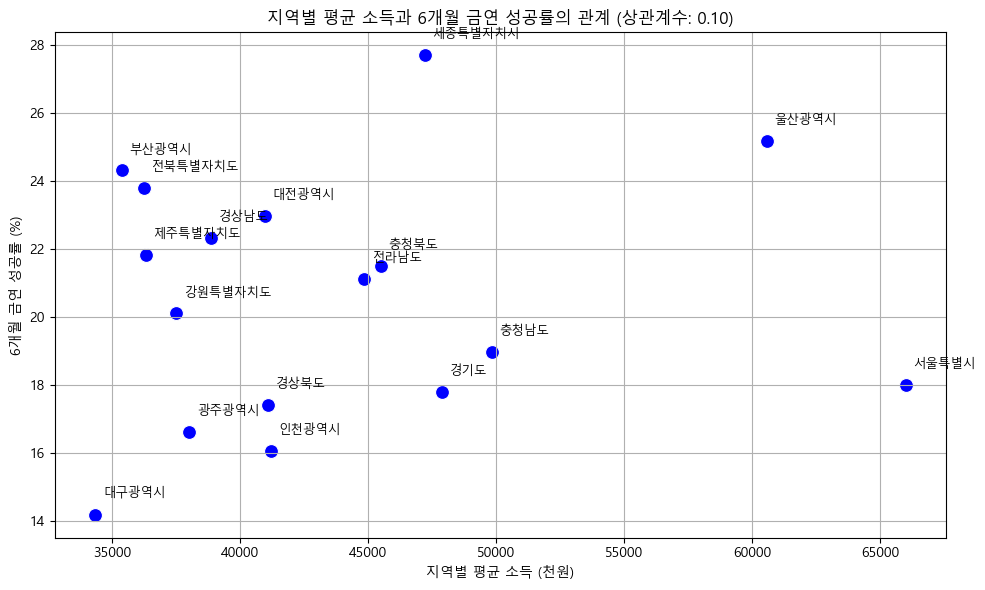

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# 폰트 설정 (운영체제에 따라 설정 변경)
system_name = platform.system()
if system_name == 'Windows':
    # 윈도우의 경우 맑은 고딕 사용
    plt.rc('font', family='Malgun Gothic') 
elif system_name == 'Darwin':
    # Mac의 경우 AppleGothic 사용
    plt.rc('font', family='AppleGothic')
else:
    # 리눅스/코랩 등 (나눔바른고딕 설치 가정)
    # !apt-get -qq -y install fonts-nanum > /dev/null # 로컬 환경에서는 주석 처리
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    # 폰트 파일이 없으면 기본 폰트로 실행될 수 있음
    try:
        font = fm.FontProperties(fname=fontpath, size=10)
        plt.rc('font', family='NanumBarunGothic') 
    except:
        pass

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 1. 지역별 금연 성공률 계산 ---

# 지역별 전체 이용자 수 계산
region_stats = smoke_df.groupby('지역').size().reset_index(name='전체이용자수')

# 4주 성공 수 계산 ('Y'인 경우)
success_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y'].groupby('지역').size().reset_index(name='4주성공수')

# 6개월 성공 수 계산 ('Y'인 경우)
success_6m = smoke_df[smoke_df['6개월평가성공여부'] == 'Y'].groupby('지역').size().reset_index(name='6개월성공수')

# 데이터 프레임 병합
region_stats = pd.merge(region_stats, success_4w, on='지역', how='left')
region_stats = pd.merge(region_stats, success_6m, on='지역', how='left')

# NaN 값을 0으로 채움
region_stats = region_stats.fillna(0)

# 성공률 계산 (%)
region_stats['4주성공률'] = (region_stats['4주성공수'] / region_stats['전체이용자수']) * 100
region_stats['6개월성공률'] = (region_stats['6개월성공수'] / region_stats['전체이용자수']) * 100

# --- 2. 소득 데이터와 결합 및 상관관계 분석 ---

# 소득 데이터 전처리 (2023년 데이터 사용)
income_2023 = income_df[['시도별', '2023 p)']].copy()
income_2023.columns = ['지역', '평균소득']
income_2023 = income_2023[income_2023['지역'] != '전국'] # 전국 합계 제외

# 성공률 데이터와 소득 데이터 병합
merged_df = pd.merge(region_stats, income_2023, on='지역')

# 상관계수 계산
corr_coef = merged_df['평균소득'].corr(merged_df['6개월성공률'])

# 결과 출력 (to_markdown 대신 to_string 사용)
print("### 1. 지역별 금연 성공률 (6개월 성공률 높은 순)")
result_table = region_stats[['지역', '전체이용자수', '4주성공률', '6개월성공률']].sort_values(by='6개월성공률', ascending=False)
print(result_table.to_string(index=False, float_format="%.1f"))

print(f"\n### 2. 소득과 6개월 금연 성공률의 상관계수: {corr_coef:.4f}")

# --- 시각화: 산점도 그리기 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='평균소득', y='6개월성공률', s=100, color='blue')

# 각 점에 지역 이름 표시
for i in range(merged_df.shape[0]):
    # 데이터프레임 인덱스가 섞여있을 수 있으므로 iloc 대신 안전하게 접근
    row = merged_df.iloc[i]
    plt.text(x=row['평균소득']+300, 
             y=row['6개월성공률']+0.5, 
             s=row['지역'], 
             fontdict=dict(color='black', size=9))

plt.title(f'지역별 평균 소득과 6개월 금연 성공률의 관계 (상관계수: {corr_coef:.2f})')
plt.xlabel('지역별 평균 소득 (천원)')
plt.ylabel('6개월 금연 성공률 (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

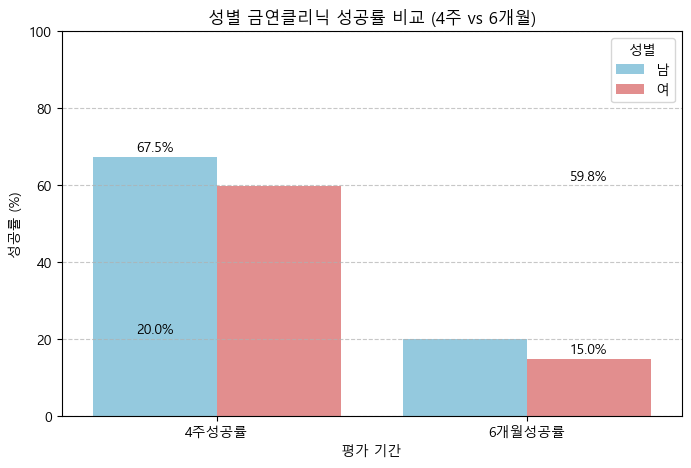

### 성별 금연 성공률 상세 데이터
성별  전체이용자수  4주성공수  6개월성공수  4주성공률  6개월성공률
 남  196564 132656   39397   67.5    20.0
 여   38815  23207    5825   59.8    15.0


In [134]:
# --- 1. 성별 전체 이용자 수 계산 ---
gender_stats = smoke_df.groupby('성별').size().reset_index(name='전체이용자수')

# --- 2. 성별 4주 및 6개월 성공 건수 계산 ---
# 'Y'인 경우만 필터링하여 성공 건수 집계
success_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='4주성공수')
success_6m = smoke_df[smoke_df['6개월평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='6개월성공수')

# 데이터 프레임 병합
gender_stats = pd.merge(gender_stats, success_4w, on='성별', how='left').fillna(0)
gender_stats = pd.merge(gender_stats, success_6m, on='성별', how='left').fillna(0)

# --- 3. 성별 성공률 계산 ---
gender_stats['4주성공률'] = (gender_stats['4주성공수'] / gender_stats['전체이용자수']) * 100
gender_stats['6개월성공률'] = (gender_stats['6개월성공수'] / gender_stats['전체이용자수']) * 100

# 그래프 출력을 위해 데이터 재구성
plot_data = gender_stats[['성별', '4주성공률', '6개월성공률']].set_index('성별').stack().reset_index(name='성공률')
plot_data.columns = ['성별', '평가기간', '성공률']

# --- 4. 시각화 (막대 그래프) ---
plt.figure(figsize=(8, 5))
sns.barplot(x='평가기간', y='성공률', hue='성별', data=plot_data, palette={'남': 'skyblue', '여': 'lightcoral'})

# 그래프에 성공률 값 표시
for index, row in plot_data.iterrows():
    plt.text(index // 2 + (0.2 if row['성별'] == '여' else -0.2), 
             row['성공률'] + 1.5, 
             f"{row['성공률']:.1f}%", 
             color='black', ha="center", size=10)


plt.title('성별 금연클리닉 성공률 비교 (4주 vs 6개월)')
plt.ylabel('성공률 (%)')
plt.xlabel('평가 기간')
plt.ylim(0, 100)
plt.legend(title='성별')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 상세 데이터 표 출력
print("### 성별 금연 성공률 상세 데이터")
print(gender_stats.to_string(index=False, float_format="%.1f"))

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10856\368547670.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='성별', y=metric_name, data=gender_data, order=plot_order, palette=bar_colors, ax=ax)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10856\368547670.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='성별', y=metric_name, data=gender_data, order=plot_order, palette=bar_colors, ax=ax)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_10856\368547670.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='성별', y=metric_name, data

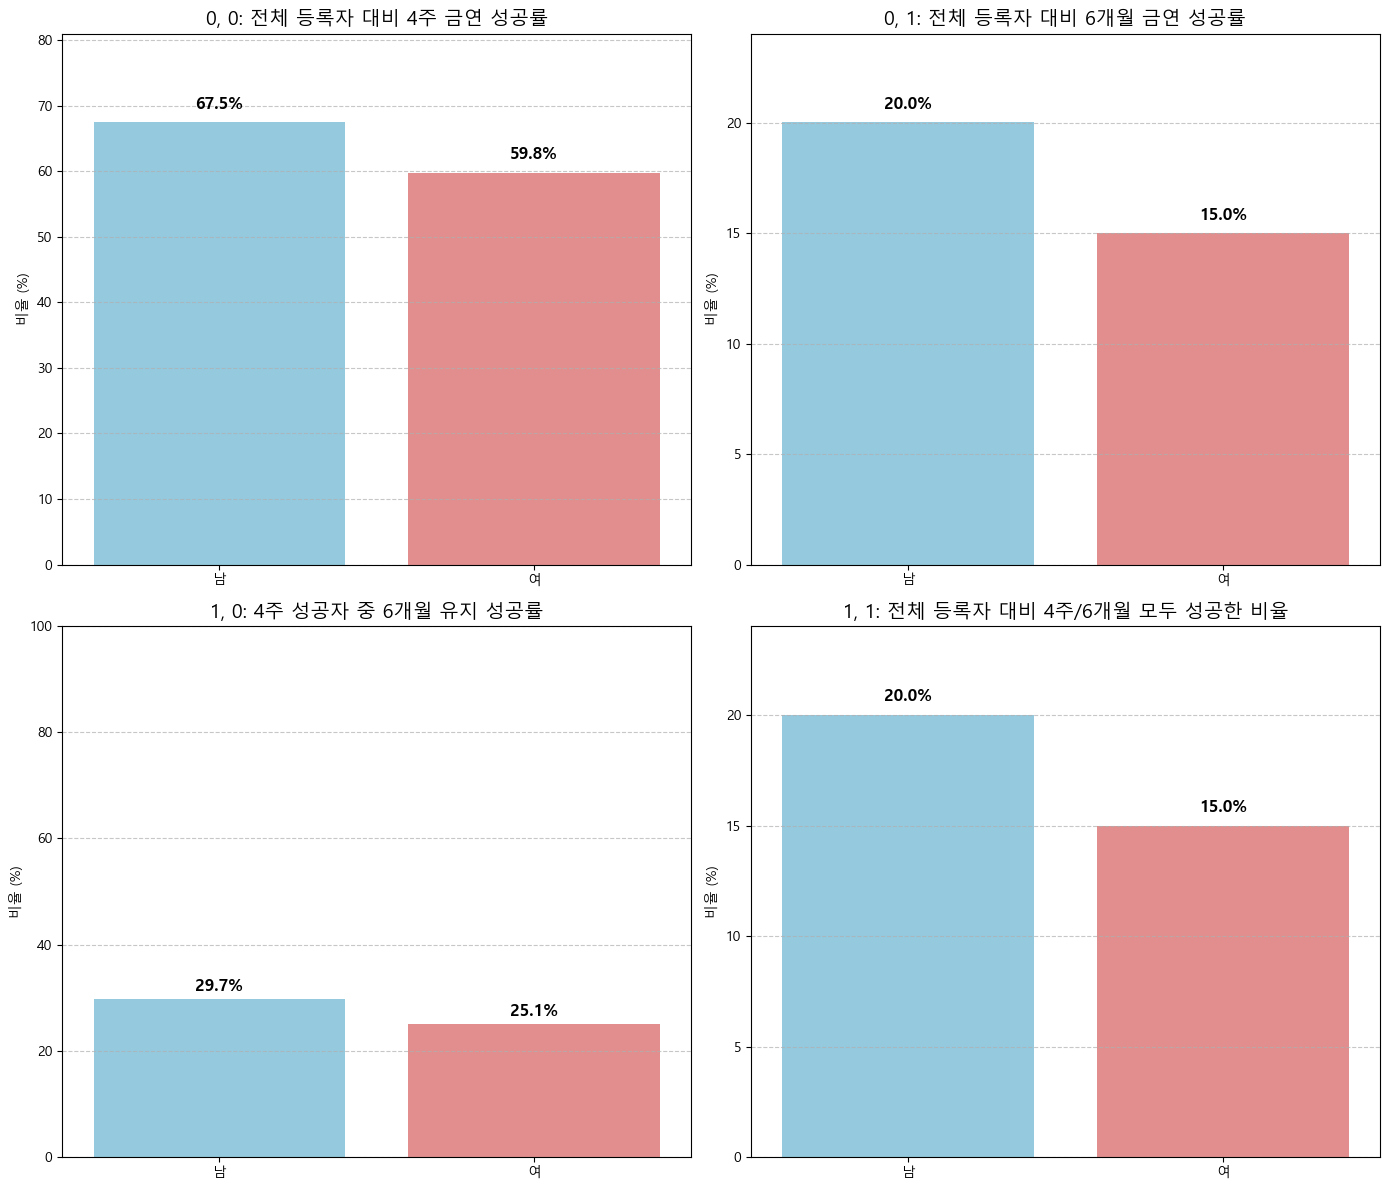


### 4가지 성별 금연 성공/유지율 상세 데이터 (단위: %)
성별  4주_성공률  6개월_성공률  유지_성공률  전체_대비_완벽성공률
 남    67.5     20.0    29.7         20.0
 여    59.8     15.0    25.1         15.0


In [ ]:
# --- 1. 기본 통계 및 비율 계산 ---

# 성별 전체 이용자 수
gender_total = smoke_df.groupby('성별').size().reset_index(name='전체_등록자수')

# 4주 성공 건수
success_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='4주_성공수')

# 6개월 성공 건수
success_6m = smoke_df[smoke_df['6개월평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='6개월_성공수')

# 4주 성공한 사람들만 필터링
successful_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y']

# 4주 성공자 중 6개월 유지 성공 건수 (이 값을 gender_data에 병합해야 함)
success_4w_to_6m = successful_4w[successful_4w['6개월평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='4주성공_후_6개월유지수')

# 4주 성공 건수 (기준)
total_successful_4w = successful_4w.groupby('성별').size().reset_index(name='4주성공자수')

# --- 2. 4가지 지표 데이터프레임 병합 및 비율 계산 ---

# 데이터 프레임 초기화
gender_data = gender_total.copy()

# A. 4주 금연 성공률
gender_data = pd.merge(gender_data, success_4w, on='성별', how='left').fillna(0)
gender_data['4주_성공률'] = (gender_data['4주_성공수'] / gender_data['전체_등록자수']) * 100

# B. 6개월 금연 성공률
gender_data = pd.merge(gender_data, success_6m, on='성별', how='left').fillna(0)
gender_data['6개월_성공률'] = (gender_data['6개월_성공수'] / gender_data['전체_등록자수']) * 100

# C. 4주 성공자 중 6개월 유지 성공률 (유지_성공률 계산을 위해 retention_data 생성)
retention_data = pd.merge(total_successful_4w, success_4w_to_6m, on='성별', how='left').fillna(0)
retention_data['유지_성공률'] = (retention_data['4주성공_후_6개월유지수'] / retention_data['4주성공자수']) * 100

# 핵심 수정: '4주성공_후_6개월유지수' 카운트 병합 (D 계산을 위해 필요)
gender_data = pd.merge(gender_data, success_4w_to_6m, on='성별', how='left').fillna(0)

# 유지 성공률 병합
gender_data = pd.merge(gender_data, retention_data[['성별', '유지_성공률']], on='성별', how='left').fillna(0)


# D. 전체 등록자 중 4주와 6개월 모두 성공한 비율 (4주성공_후_6개월유지수 / 전체_등록자수)
gender_data['전체_대비_완벽성공률'] = (gender_data['4주성공_후_6개월유지수'] / gender_data['전체_등록자수']) * 100


# --- 3. Subplots 시각화 (2x2) ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_order = ['남', '여']
bar_colors = {'남': 'skyblue', '여': 'lightcoral'}

titles = [
    '전체 등록자 대비 4주 금연 성공률',
    '전체 등록자 대비 6개월 금연 성공률',
    '4주 성공자 중 6개월 유지 성공률',
    '전체 등록자 대비 4주/6개월 모두 성공한 비율'
]
metrics = [
    '4주_성공률', 
    '6개월_성공률', 
    '유지_성공률', 
    '전체_대비_완벽성공률'
]

# 플롯 그리기
for i, ax in enumerate(axes.flat):
    metric_name = metrics[i]
    title_name = titles[i]
    
    sns.barplot(x='성별', y=metric_name, data=gender_data, order=plot_order, palette=bar_colors, ax=ax)
    
    ax.set_title(title_name, fontsize=14)
    ax.set_ylabel('비율 (%)')
    ax.set_xlabel('')
    ax.set_ylim(0, gender_data[metric_name].max() * 1.2 if metric_name != '유지_성공률' else 100)

    # 값 표시
    for index, row in gender_data.iterrows():
        rate = row[metric_name]
        ax.text(index, rate + (gender_data[metric_name].max() * 0.03 if metric_name != '유지_성공률' else 1.5), 
                f"{rate:.1f}%", color='black', ha="center", size=12, weight='bold')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- 상세 데이터 표 출력 ---
print("\n### 4가지 성별 금연 성공/유지율 상세 데이터 (단위: %)")
print(gender_data[['성별', '4주_성공률', '6개월_성공률', '유지_성공률', '전체_대비_완벽성공률']].to_string(index=False, float_format="%.1f"))

In [145]:
# --- 1. 기본 통계 및 비율 계산 ---

# 성별 전체 이용자 수
gender_total = smoke_df.groupby('성별').size().reset_index(name='전체_등록자수')

# 4주 성공 건수
success_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='4주_성공수')

# 6개월 성공 건수
success_6m = smoke_df[smoke_df['6개월평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='6개월_성공수')

# 4주 성공자 중 6개월 유지 성공 건수
successful_4w = smoke_df[smoke_df['4주평가성공여부'] == 'Y']
success_4w_to_6m = successful_4w[successful_4w['6개월평가성공여부'] == 'Y'].groupby('성별').size().reset_index(name='4주성공_후_6개월유지수')

# 4주 성공자 수 (기준)
total_successful_4w = successful_4w.groupby('성별').size().reset_index(name='4주성공자수')

# --- 2. 4가지 지표 데이터프레임 병합 및 비율 계산 ---

# 데이터 프레임 초기화
gender_data = gender_total.copy()

# A. 4주 금연 성공률
gender_data = pd.merge(gender_data, success_4w, on='성별', how='left').fillna(0)
gender_data['4주_성공률'] = (gender_data['4주_성공수'] / gender_data['전체_등록자수']) * 100

# B. 6개월 금연 성공률
gender_data = pd.merge(gender_data, success_6m, on='성별', how='left').fillna(0)
gender_data['6개월_성공률'] = (gender_data['6개월_성공수'] / gender_data['전체_등록자수']) * 100

# C. 4주 성공자 중 6개월 유지 성공률
retention_data = pd.merge(total_successful_4w, success_4w_to_6m, on='성별', how='left').fillna(0)
retention_data['유지_성공률'] = (retention_data['4주성공_후_6개월유지수'] / retention_data['4주성공자수']) * 100
gender_data = pd.merge(gender_data, retention_data[['성별', '유지_성공률']], on='성별', how='left').fillna(0)

# D. 전체 등록자 중 4주와 6개월 모두 성공한 비율 (4주_성공수_to_6개월유지수 / 전체_등록자수)
gender_data['전체_대비_완벽성공률'] = (gender_data['4주성공_후_6개월유지수'] / gender_data['전체_등록자수']) * 100


# --- 3. Subplots 시각화 (2x2) ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plot_order = ['남', '여']
bar_colors = {'남': 'skyblue', '여': 'lightcoral'}

titles = [
    '0, 0: 전체 등록자 대비 4주 금연 성공률',
    '0, 1: 전체 등록자 대비 6개월 금연 성공률',
    '1, 0: 4주 성공자 중 6개월 유지 성공률',
    '1, 1: 전체 등록자 대비 4주/6개월 모두 성공한 비율'
]
metrics = [
    '4주_성공률', 
    '6개월_성공률', 
    '유지_성공률', 
    '전체_대비_완벽성공률'
]

# 플롯 그리기
for i, ax in enumerate(axes.flat):
    metric_name = metrics[i]
    title_name = titles[i]
    
    sns.barplot(x='성별', y=metric_name, data=gender_data, order=plot_order, palette=bar_colors, ax=ax)
    
    ax.set_title(title_name, fontsize=14)
    ax.set_ylabel('비율 (%)')
    ax.set_xlabel('')
    ax.set_ylim(0, gender_data[metric_name].max() * 1.2 if metric_name != '유지_성공률' else 100) # 유지 성공률은 100% 기준으로

    # 값 표시
    for index, row in gender_data.iterrows():
        rate = row[metric_name]
        ax.text(index, rate + (gender_data[metric_name].max() * 0.03 if metric_name != '유지_성공률' else 1.5), 
                f"{rate:.1f}%", color='black', ha="center", size=12, weight='bold')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- 상세 데이터 표 출력 ---
print("\n### 4가지 성별 금연 성공/유지율 상세 데이터 (단위: %)")
print(gender_data[['성별', '4주_성공률', '6개월_성공률', '유지_성공률', '전체_대비_완벽성공률']].to_string(index=False, float_format="%.1f"))

KeyError: '4주성공_후_6개월유지수'

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10856\4065693591.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='소득그룹', y='6개월성공률', data=merged_df,


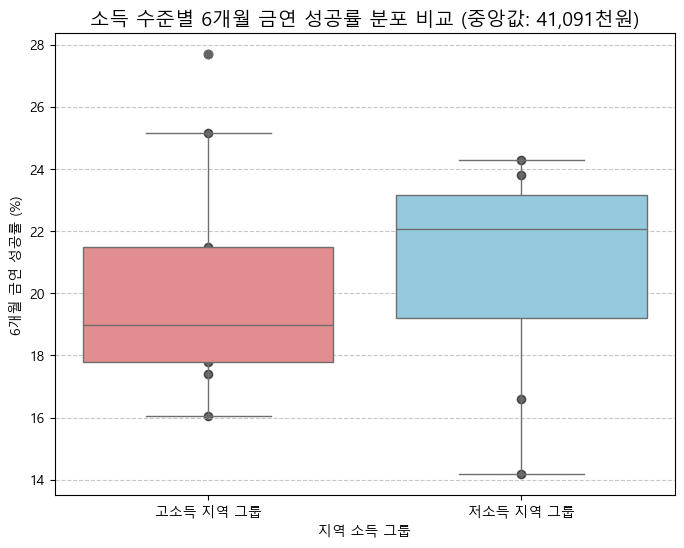


### 소득 그룹별 6개월 금연 성공률 통계 요약
    소득 그룹  중앙값(%)  평균(%)  최소값(%)  최대값(%)  표준편차
고소득 지역 그룹    19.0   20.4    16.1    27.7   3.9
저소득 지역 그룹    22.1   20.8    14.2    24.3   3.6


In [ ]:
# 폰트 설정 (이전 설정 유지)
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic') 
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    try:
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=10)
        plt.rc('font', family='NanumBarunGothic') 
    except:
        pass
        
plt.rcParams['axes.unicode_minus'] = False 

# --- 1. 소득 데이터 준비 및 그룹 분류 ---
income_2023 = income_df[['시도별', '2023 p)']].copy()
income_2023.columns = ['지역', '평균소득']
# '전국' 및 누락된 값 제거 및 데이터 타입 변환
income_2023 = income_2023[income_2023['지역'] != '전국']
income_2023['평균소득'] = pd.to_numeric(income_2023['평균소득'], errors='coerce')
income_2023 = income_2023.dropna(subset=['평균소득'])

# 소득 중앙값 계산
median_income = income_2023['평균소득'].median()

# 지역을 '고소득'과 '저소득' 그룹으로 분류
income_2023['소득그룹'] = income_2023['평균소득'].apply(
    lambda x: '고소득 지역 그룹' if x >= median_income else '저소득 지역 그룹'
)

# --- 2. 금연 성공률 데이터 계산 (이전 코드 재사용) ---

# 지역별 전체 이용자 수 및 6개월 성공 건수 계산
region_stats = smoke_df.groupby('지역').size().reset_index(name='전체이용자수')
success_6m = smoke_df[smoke_df['6개월평가성공여부'] == 'Y'].groupby('지역').size().reset_index(name='6개월성공수')

region_stats = pd.merge(region_stats, success_6m, on='지역', how='left').fillna(0)
region_stats['6개월성공률'] = (region_stats['6개월성공수'] / region_stats['전체이용자수']) * 100

# --- 3. 소득 그룹과 성공률 데이터 병합 ---
merged_df = pd.merge(region_stats, income_2023[['지역', '소득그룹']], on='지역', how='inner')

group_order = ['고소득 지역 그룹', '저소득 지역 그룹']
group_mapping = {group_order[i]: i for i in range(len(group_order))}

# --- 4. 시각화: 상자 그림(Box Plot) ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='소득그룹', y='6개월성공률', data=merged_df, 
            order=['고소득 지역 그룹', '저소득 지역 그룹'], 
            palette=['lightcoral', 'skyblue'])
plt.scatter(x=merged_df['소득그룹'], y=merged_df['6개월성공률'], color='black', alpha=0.6) # 개별 지역 점 추가 

plt.title(f'소득 수준별 6개월 금연 성공률 분포 비교 (중앙값: {median_income:,.0f}천원)', fontsize=14)
plt.xlabel('지역 소득 그룹')
plt.ylabel('6개월 금연 성공률 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 5. 상세 데이터 및 해석 ---
# 그룹별 통계 요약
summary = merged_df.groupby('소득그룹')['6개월성공률'].agg(['median', 'mean', 'min', 'max', 'std']).reset_index()
summary.columns = ['소득 그룹', '중앙값(%)', '평균(%)', '최소값(%)', '최대값(%)', '표준편차']
print("\n### 소득 그룹별 6개월 금연 성공률 통계 요약")
print(summary.to_string(index=False, float_format="%.1f"))

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10856\1389699606.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='소득그룹', y='6개월성공률', data=merged_df,


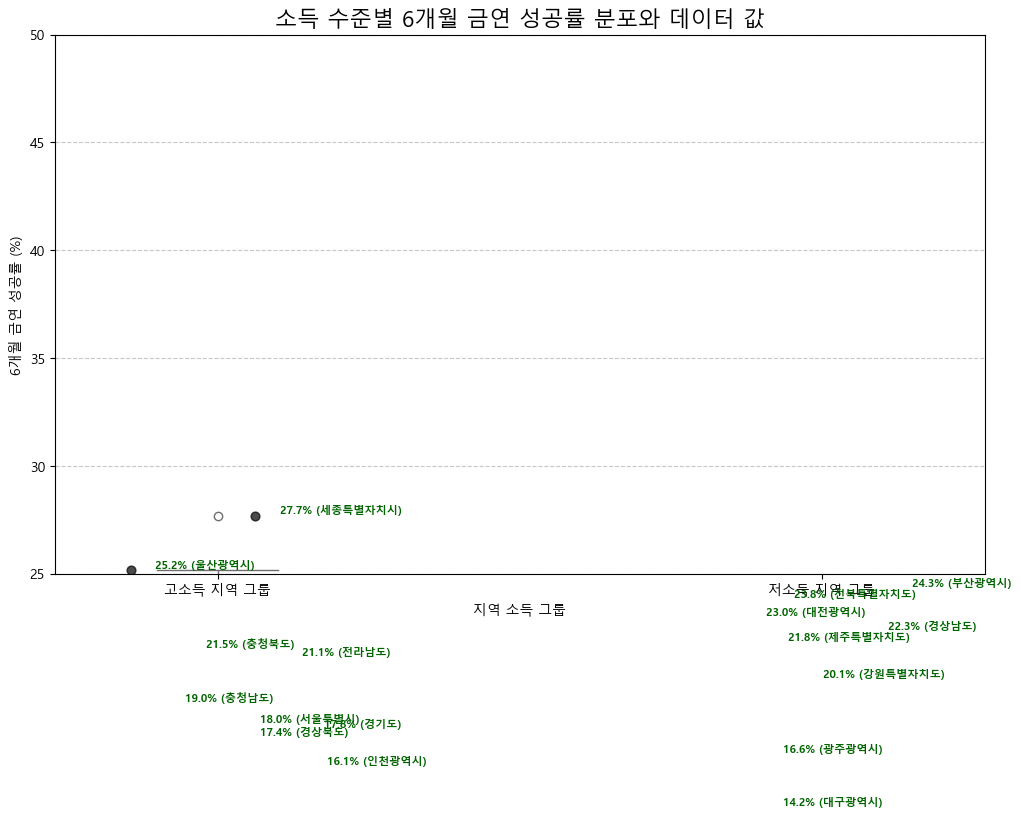

In [151]:
# --- 4. 시각화: 상자 그림(Box Plot) 및 데이터 값 표시 ---
plt.figure(figsize=(12, 7)) # 가로 폭을 약간 늘려 텍스트가 잘 보이도록 조정

# 그룹 순서 정의 
group_order = ['고소득 지역 그룹', '저소득 지역 그룹']

# 상자 그림 그리기
ax = sns.boxplot(x='소득그룹', y='6개월성공률', data=merged_df, 
            order=group_order, 
            palette=['lightcoral', 'skyblue'], 
            width=0.4) 

# X축 위치 매핑 (고소득=0, 저소득=1)
group_mapping = {group_order[i]: i for i in range(len(group_order))} 

# Jittering을 위한 난수 생성 및 적용 (겹침 방지)
np.random.seed(42) 
merged_df['jitter'] = merged_df['소득그룹'].apply(
    lambda x: np.random.uniform(-0.15, 0.15)
)

for index, row in merged_df.iterrows():
    # 1. X축 위치 계산: 기본 인덱스 + Jitter
    x_pos = group_mapping[row['소득그룹']] + row['jitter']
    y_val = row['6개월성공률']
    
    # 2. 점 표시 (scatter)
    ax.scatter(x_pos, y_val, color='black', alpha=0.7, s=40, zorder=3)

    # 3. 데이터 값(6개월성공률) 표시 (text)
    data_label = f"{y_val:.1f}% ({row['지역']})" # 성공률과 지역명을 함께 표시
    
    # 텍스트 위치는 점의 약간 오른쪽 위에 배치
    ax.text(x_pos + 0.04, y_val + 0.1, 
             data_label, 
             fontdict=dict(color='darkgreen', size=8, weight='bold'), 
             zorder=4, 
             ha='left') 

plt.title(f'소득 수준별 6개월 금연 성공률 분포와 데이터 값', fontsize=16)
plt.xlabel('지역 소득 그룹')
plt.ylabel('6개월 금연 성공률 (%)')
plt.ylim(25, 50) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()